In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

data = pd.read_csv('/Users/kaylaxie/Desktop/dataset.csv')

In [90]:
data.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

In [91]:
len(data)

148654

In [92]:
data.count()*100/148654

Id                  100.000000
EmployeeName        100.000000
JobTitle            100.000000
BasePay              99.590324
OvertimePay          99.997309
OtherPay             99.997309
Benefits             75.673039
TotalPay            100.000000
TotalPayBenefits    100.000000
Year                100.000000
Notes                 0.000000
Agency              100.000000
Status                0.000000
dtype: float64

In [93]:
data.set_index('Id',inplace=True)

In [94]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


In [95]:
#Question 1
data['BasePay'].mean()
#The average of Basepay is $66325.45, including the 0s.

66325.44884048768

In [96]:
#Question 2
data['Benefits'].fillna(0, inplace=True)
data.count()

EmployeeName        148654
JobTitle            148654
BasePay             148045
OvertimePay         148650
OtherPay            148650
Benefits            148654
TotalPay            148654
TotalPayBenefits    148654
Year                148654
Notes                    0
Agency              148654
Status                   0
dtype: int64

In [97]:
data['Year'].value_counts()
#this dataset covers employee information from 2011 to 2014

2014    38123
2013    37606
2012    36766
2011    36159
Name: Year, dtype: int64

In [98]:
data['EmployeeName']=[i.lower() for i in data['EmployeeName']]

In [99]:
sum(data[data.EmployeeName== "joseph driscoll"]["Benefits"])
#The total benefits of "Joseph Driscoll" over the year 2011 to year 2014 are $42919.16.

42919.16

In [100]:
#Question 3
data.loc[data["TotalPay"].argmax(),"EmployeeName"]
#The highest paid person is "Nathaniel Ford".

/Users/kaylaxie/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  


'nathaniel ford'

In [101]:
#Question 4
data['EmployeeName'] = data['EmployeeName'].str.strip()
BasePay_by_employee=data.groupby(['Year']).mean()['BasePay']
BasePay_by_employee

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

In [102]:
#Question 5
jobtitlecount = pd.value_counts(data[data['Year'] == 2013]["JobTitle"])
jobtitlecount = pd.DataFrame({"title":jobtitlecount.index,"count":jobtitlecount.values})
len(jobtitlecount[jobtitlecount['count'] == 1])

202

In [103]:
#Question 6
data['JobTitle']=data['JobTitle'].str.lower()
import re
def detectchief(x):
    return bool(re.search(pattern = "(.*)chief(.*)", string = x))

sum(data['JobTitle'].apply(lambda x:detectchief(x)))

627

Text(0,0.5,'TotalPayBenefits')

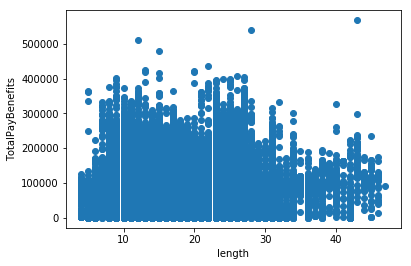

In [104]:
#Question 7
data['JobTitle']=data['JobTitle'].apply(lambda x:x.replace(" ", ""))
data['length']=data['JobTitle'].apply(lambda x:len(x))
import matplotlib.pyplot as plt
plt.scatter(data['length'],data['TotalPayBenefits'])
plt.xlabel('length')
plt.ylabel('TotalPayBenefits')
#from the graph below we can see that there is no correlation between length and TotalPayBenefits,
#because for each length, TotalPayBenefits can take a wide range of values.

In [105]:
import scipy
from scipy.stats import pearsonr
scipy.stats.mstats.pearsonr(data['length'],data['TotalPayBenefits'])
#This further confirms that there exists no linear relationship between the two variables.
#The correlation coefficient is -0.0364, implying a negligible linear relationship between the length of JobTitle and TotalPayBenefits.

(-0.03639702423148055, masked_array(data=9.17022329e-45,
              mask=False,
        fill_value=1e+20))

In [106]:
print("There is no correlation between length of the Job Title string and Salary.")

There is no correlation between length of the Job Title string and Salary.


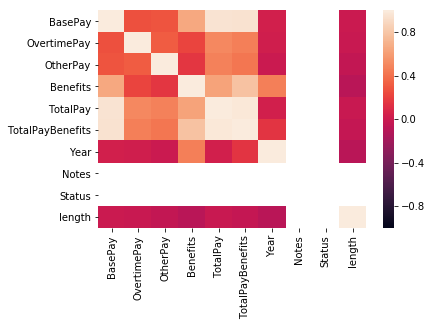

In [107]:
#Question 8
import seaborn as sns
sns.heatmap(data.corr(),vmin=-1, vmax=1)

In [108]:
#Question 9
MaxBasePay_by_job=data.groupby(['JobTitle']).max()['BasePay']
MaxBasePay_by_job

JobTitle
accountant                                        65392.01
accountanti                                       71605.00
accountantii                                      82553.67
accountantiii                                    103766.03
accountantintern                                  64629.68
accountantiv                                     119516.19
accountclerk                                      60838.20
acpo,juvp,juvprob(sfers)                          62290.78
acupuncturist                                     75411.00
adm,sfghmedicalcenter                            271831.50
adminanalyst3                                     95316.22
adminhearingexaminer                              93197.07
administrativeanalyst                             98419.02
administrativeanalysti                            51604.96
administrativeanalystii                           75585.82
administrativeanalystiii                          92847.00
administrativeengineer                         

In [130]:
#Question 10
#I am just writing my thoughts to approach this problem. To actually realize it, I need more time and need to learn text mining.
#np.array(data_categorized)[np.argsort(data_categorized['TotalPayBenefits'])]
#Applied text mining techniques (k-means clustering) to classify different job titles 
#into different sectors.
#from there, I can use groupby(sectors).mean()
#then use argsort() to arrange the salary from high to low
#finally head(30) to pick the top 30 sectors

KeyError: 'TotalPayBenefits'

In [110]:
#Question 11
import scipy
from scipy.stats import pearsonr
data['BasePay'].fillna(0, inplace=True)
correlation, p_value = pearsonr(data['BasePay'],data['TotalPay'])
correlationtext="correlation coefficient:",correlation
correlationtext

('correlation coefficient:', 0.9546925905788393)

Text(150000,40000,"('correlation coefficient:', 0.9546925905788393)")

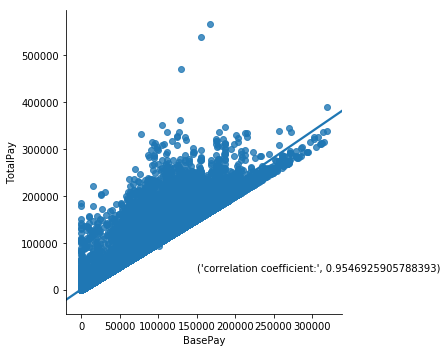

In [111]:
import seaborn as sns
sns.lmplot(x='BasePay',y='TotalPay',data=data,fit_reg=True) 
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.text(150000,40000,correlationtext)
#BasePay is a good indicator of TotalPay. TotalPay is strongly and positively correlated to BasePay.
#A correlation coefficient of 0.9547, which is close to 1,indicates a strong linear relationship.

(array([8.735e+03, 5.007e+03, 4.298e+03, 3.742e+03, 3.083e+03, 2.621e+03,
        2.336e+03, 2.092e+03, 1.924e+03, 1.561e+03, 1.609e+03, 1.631e+03,
        1.714e+03, 1.911e+03, 1.992e+03, 2.607e+03, 3.517e+03, 4.064e+03,
        5.143e+03, 4.367e+03, 5.500e+03, 5.702e+03, 6.410e+03, 3.847e+03,
        4.017e+03, 3.410e+03, 4.171e+03, 3.072e+03, 2.755e+03, 3.258e+03,
        2.885e+03, 2.889e+03, 2.824e+03, 2.274e+03, 2.074e+03, 2.974e+03,
        2.061e+03, 3.571e+03, 2.118e+03, 2.801e+03, 1.765e+03, 1.964e+03,
        1.172e+03, 1.523e+03, 1.018e+03, 1.284e+03, 7.880e+02, 7.560e+02,
        7.280e+02, 4.490e+02, 3.090e+02, 3.970e+02, 4.100e+02, 1.990e+02,
        2.360e+02, 3.990e+02, 3.660e+02, 1.500e+02, 1.620e+02, 2.670e+02,
        4.830e+02, 9.700e+01, 1.550e+02, 1.500e+02, 1.300e+02, 9.400e+01,
        7.600e+01, 9.300e+01, 7.700e+01, 9.100e+01, 2.900e+01, 3.600e+01,
        2.600e+01, 2.100e+01, 2.000e+01, 1.400e+01, 2.300e+01, 1.000e+01,
        1.200e+01, 7.000e+00, 6.000e+0

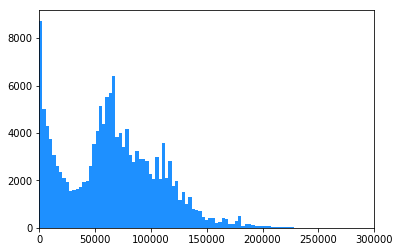

In [112]:
#Question 12: other interesting insights
#plotting the distribution of BasePay 
xhigh = 300000
plt.xlim(0,xhigh)
temp = data[data['BasePay'] <= xhigh] 
plt.hist(temp['BasePay'],bins=100,color='#1E90FF')

In [113]:
#Insight 1
#There are some maximas around $70000, $120000.
#They could be the median wage of entry-level positions and middle-level positions.
#The really high values (above $200000) are rare.

In [114]:
data.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status,length
count,148654.000000,148650.000000,148650.000000,148654.000000,148654.000000,148654.000000,148654.000000,0.0,0.0,148654.000000
mean,66053.729288,5066.059886,3648.767297,18924.232839,74768.321972,93692.554811,2012.522643,NaN,NaN,17.572255
std,42886.711158,11454.380559,8056.601866,17165.279495,50517.005274,62793.533483,1.117538,NaN,NaN,6.490636
min,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN,4.000000
25%,32792.545000,0.000000,0.000000,0.000000,36168.995000,44065.650000,2012.000000,NaN,NaN,13.000000
50%,64861.600000,0.000000,811.270000,23214.020000,71426.610000,92404.090000,2013.000000,NaN,NaN,16.000000
75%,94605.740000,4658.175000,4236.065000,33468.980000,105839.135000,132876.450000,2014.000000,NaN,NaN,23.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN,47.000000


In [115]:
#Insight 2
#From the summary statistics above, we can se the minimums of different kinds of pay are negative.
#The negative pay might mean the company pays the employees in advance before they actually conduct the services or do the work.

In [116]:
#Bonus
#I am just writing my thoughts here. I am not very familiar with regular expression in Python.
#Use regular expression to count the number of times that a, e, i, o, u appear in a field of 
#'EmployeeName'.
#create averagepay column using groupby['EmployeeName'].mean('TotalPayBenefits')
#use plt.scatter(data['VowelCount'],data['TotalPayBenefits']) to plot the two variables
#use pearsonr to calculate the correlation coefficient
#if absolute value of correlation >0.9, very strong; if absolute value of correlation >0.7, moderately strong